In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
df = pd.read_excel("PARN02100.xlsx")
df["Parametro"].value_counts()

Turbidez                                   24
Coloração                                  24
Nitrogênio-Nitrato                         24
Condutividade                              24
Nitrogênio-Nitrito                         24
Sólido Dissolvido Total                    24
Temperatura da Água                        24
Cloreto Total                              24
Escherichia coli**                         24
Oxigênio Dissolvido                        24
Fósforo Total                              24
Carbono Orgânico Total                     24
DBO (5, 20)                                24
Chuvas nas últimas 24h                     24
Sólido Total                               24
Nitrogênio Amoniacal                       24
pH                                         24
Temperatura do Ar                          24
Fósforo-Ortofosfato                        19
Fluoreto Total                             19
Sulfato Total                              19
Cobre Dissolvido                  

In [3]:
agua = df[df["Parametro"]=='Temperatura da Água']
agua = agua["Valor"]

In [4]:
def create_df(data_entrada, serie):
    new_data = pd.DataFrame()
    new_data[serie] = pd.to_numeric(data_entrada["Valor"].str.replace(',','.'), downcast="float")
    new_data = new_data.set_index(data_entrada["Data Coleta"])
    return(new_data)

In [5]:
data_ = pd.DataFrame()
#Escherichia coli** -> Coliformes Termotolerantes
w_coli = 0.15
data_coli = df[df["Parametro"]=='Escherichia coli**']
#pH
w_pH = 0.12
data_pH = df[df["Parametro"]=='pH']
#DBO (5, 20)
w_DBO = 0.10
data_DBO = df[df["Parametro"]=='DBO (5, 20)']
#Oxigênio Dissolvido
w_OD = 0.17
data_OD = df[df["Parametro"]=='Oxigênio Dissolvido']
#Temperatura da Água
w_temp = 0.10
data_temp = df[df["Parametro"]=='Temperatura da Água']
data_temp_ar = df[df["Parametro"]=='Temperatura do Ar']
#Nitrogênio Total
w_nitro = 0.10
data_nitro = df[df["Parametro"]=='Nitrogênio Total']
#Fósforo Total
w_fosf = 0.10
data_fosf = df[df["Parametro"]=='Fósforo Total']
#Turbidez
w_turb = 0.08
data_turb = df[df["Parametro"]=='Turbidez']
#Sólido Dissolvido Total -> Resíduo Total
w_res = 0.08
data_res = df[df["Parametro"]=='Sólido Dissolvido Total']
#---------------------------------------------------------------------------------------
data_ = pd.merge(create_df(data_DBO, "DBO"),create_df(data_nitro, "Nitrogenio"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_coli, "Coliformes"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_pH, "pH"),on='Data Coleta')
#data_ = pd.merge(data_,create_df(data_OD, "OD"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_temp, "Temperatura da Água"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_temp_ar, "Temperatura do Ar"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_fosf, "Fosforo"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_turb, "Turbidez"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_res, "Residuos"),on='Data Coleta')
data_["CF"] = data_["Coliformes"].values * 1.25
vt = []
for i in range(0, data_.shape[0]):
    vt.append(data_["Temperatura da Água"].values[i]-data_["Temperatura do Ar"].values[i])
data_["Temperatura"] = vt
data_

,DBO,Nitrogenio,Coliformes,pH,Temperatura da Água,Temperatura do Ar,Fosforo,Turbidez,Residuos,CF,Temperatura
Data Coleta,,,,,,,,,,,
01/03/2016,2.0,0.40,2.0,7.30,28.299999,26.700001,0.010,2.2,77.0,2.50,1.599998
03/05/2016,2.0,0.35,1.0,7.30,24.799999,22.500000,0.010,1.6,55.0,1.25,2.299999
19/07/2016,2.0,0.37,1.0,7.50,21.799999,19.799999,0.010,1.0,128.0,1.25,2.000000
01/09/2016,2.0,0.25,1.0,7.30,22.400000,21.000000,0.010,1.0,70.0,1.25,1.400000
30/11/2016,2.0,0.19,2.0,7.10,26.500000,22.000000,0.010,1.0,75.0,2.50,4.500000
03/01/2017,2.0,0.39,1.0,6.73,27.200001,28.200001,0.010,1.2,67.0,1.25,-1.000000
05/09/2017,2.0,0.44,1.0,7.50,23.100000,21.900000,0.010,1.8,100.0,1.25,1.200001
21/11/2017,2.0,0.37,1.0,7.20,26.299999,28.500000,0.010,1.1,100.0,1.25,-2.200001
04/01/2018,2.0,0.45,1.0,7.20,27.400000,27.000000,0.010,1.4,100.0,1.25,0.400000


In [6]:
s = {'01/03/2016': 0.9, '30/11/2016': 0.75, 
     '03/01/2017': 0.99,'21/11/2017': 0.98, 
     '04/01/2018': 0.80,'20/11/2018': 0.92}
k = ['01/03/2016', '30/11/2016', '03/01/2017', '21/11/2017', '04/01/2018', '20/11/2018']
v = [0.9, 0.75, 0.99, 0.98, 0.8, 0.92]
df = pd.DataFrame()
df["OD"] = v
df["Data Coleta"] = k
df = pd.merge(df,data_,on='Data Coleta')
df = df.set_index(pd.to_datetime(df["Data Coleta"]))
df

,OD,Data Coleta,DBO,Nitrogenio,Coliformes,pH,Temperatura da Água,Temperatura do Ar,Fosforo,Turbidez,Residuos,CF,Temperatura
Data Coleta,,,,,,,,,,,,,
2016-01-03,0.90,01/03/2016,2.0,0.40,2.0,7.30,28.299999,26.700001,0.01,2.2,77.0,2.50,1.599998
2016-11-30,0.75,30/11/2016,2.0,0.19,2.0,7.10,26.500000,22.000000,0.01,1.0,75.0,2.50,4.500000
2017-03-01,0.99,03/01/2017,2.0,0.39,1.0,6.73,27.200001,28.200001,0.01,1.2,67.0,1.25,-1.000000
2017-11-21,0.98,21/11/2017,2.0,0.37,1.0,7.20,26.299999,28.500000,0.01,1.1,100.0,1.25,-2.200001
2018-04-01,0.80,04/01/2018,2.0,0.45,1.0,7.20,27.400000,27.000000,0.01,1.4,100.0,1.25,0.400000
2018-11-20,0.92,20/11/2018,2.0,0.49,3.0,7.20,26.299999,25.600000,0.02,1.4,100.0,3.75,0.699999


In [7]:
dfNT = pd.read_csv('csv_iqa/NITROGENIOCSV.csv', delimiter=';', decimal=',', header=None)
dfFT = pd.read_csv('csv_iqa/fosforo.csv', delimiter=',', decimal='.', header=None)
dfDBO = pd.read_csv('csv_iqa\DEMANDACSV.csv', delimiter=';', decimal=',', header=None)
dfOD = pd.read_csv('csv_iqa/o2dissolvido.csv', delimiter=',', decimal='.', header=None)

In [8]:
def q_pH(pH):
  A = 0.05421
  B = 1.23
  C = -0.09873 
  return (A*pH**(B*pH + C*(pH**2)) + 5.213)

def q_CF(CF):
  A = 98.03
  B = -36.45
  C = 3.138
  D = 0.06776
  return (A + B*math.log10(CF) + C*(math.log10(CF)**2) + D*(math.log10(CF)**3))

def q_DBO(DBO):
  return (np.interp(DBO, dfDBO[0], dfDBO[1]))

def q_FT(FT):
  return (np.interp(FT, dfFT[0], dfFT[1]))

def q_NT(NT):
  return (np.interp(NT, dfNT[0], dfNT[1]))

def q_TU(TU):
  A = 97.34
  B = -0.01139
  C = -0.04917
  return(A*math.exp(B*TU + C*math.sqrt(TU)))

def q_dT(dT):
  A = 0.0003869
  B = 0.1815
  C = 0.01081
  return (1/(A*((dT+B)**2) + C))

def q_ST(ST):
  A = 80.26
  B = -0.00107
  C = 0.03009
  D = -0.1185
  return (A * math.exp(B*ST + C*math.sqrt(ST)) + D*ST)

def q_OD(OD):
    return(np.interp(OD, dfOD[0], dfOD[1]))


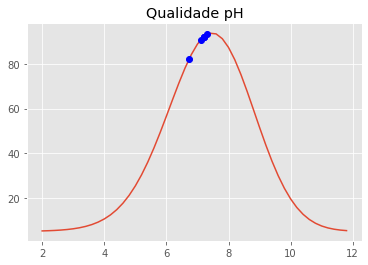

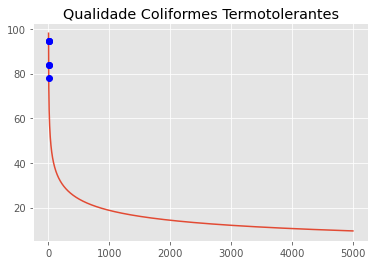

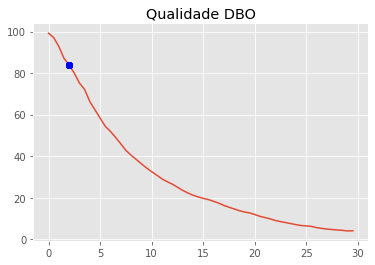

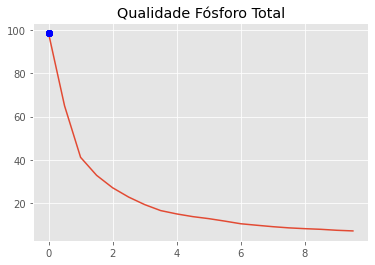

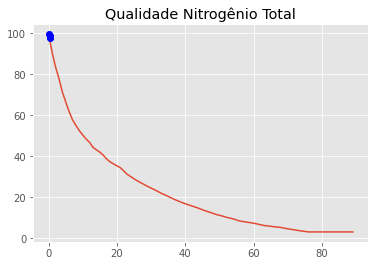

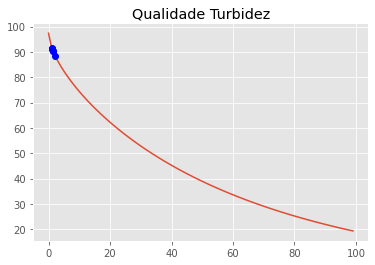

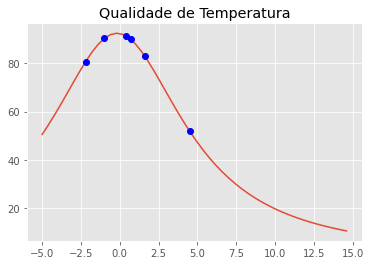

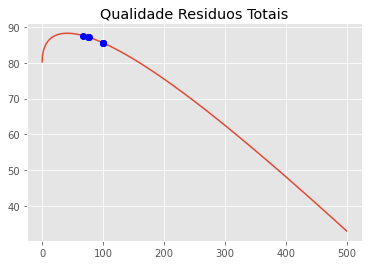

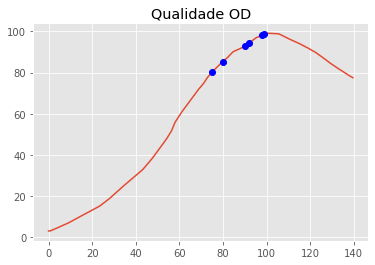

In [23]:
def check_func(func, l1, *args):
    l2 = []
    for e in l1:
        l2.append(func(e))
    plt.plot(l1, l2)
    plt.grid(True)
    if args == "log":
        plt.xscale('log')
    
plt.style.use('ggplot')
plt.title('Qualidade pH')
l1 = np.arange(2,12, 0.2)
check_func(q_pH, l1)
for e in df["pH"].values:
    plt.plot(e, q_pH(e), 'o', color="blue")
plt.show()

plt.title('Qualidade Coliformes Termotolerantes')
l1 = np.arange(1,5000, 2)
check_func(q_CF, l1, "log")
for e in df["CF"].values:
    plt.plot(e, q_CF(e), 'o', color="blue")
plt.show()

plt.title('Qualidade DBO')
l1 = np.arange(0,30, 0.5)
check_func(q_DBO, l1)
for e in df["DBO"].values:
    plt.plot(e, q_DBO(e), 'o', color="blue")
plt.show()

plt.title('Qualidade Fósforo Total')
l1 = np.arange(0,10, 0.5)
check_func(q_FT, l1)
for e in df["Fosforo"].values:
    plt.plot(e, q_FT(e), 'o', color="blue")
plt.show()

plt.title('Qualidade Nitrogênio Total')
l1 = np.arange(0,90, 1)
check_func(q_NT, l1)
for e in df["Nitrogenio"].values:
    plt.plot(e, q_NT(e), 'o', color="blue")
plt.show()

plt.title('Qualidade Turbidez')
l1 = np.arange(0,100, 1)
check_func(q_TU, l1)
for e in df["Turbidez"].values:
    plt.plot(e, q_TU(e), 'o', color="blue")
plt.show()

plt.title('Qualidade de Temperatura')
l1 = np.arange(-5, 15, 0.4)
check_func(q_dT, l1)
for e in df["Temperatura"].values:
    plt.plot(e, q_dT(e), 'o', color="blue")
plt.show()

plt.title('Qualidade Residuos Totais')
l1 = np.arange(0, 500, 0.4)
check_func(q_ST, l1)
for e in df["Residuos"].values:
    plt.plot(e, q_ST(e), 'o', color="blue")
plt.show()

plt.title('Qualidade OD')
l1 = np.arange(0, 140, 0.4)
check_func(q_OD, l1)
for e in df["OD"].values:
    plt.plot(e*100, q_OD(e*100), 'o', color="blue")
plt.show()

# l1 = np.arange(0, 500, 0.4)
# check_func(q_OD, l1)


In [10]:
def get_qvalue(serie, fx, w):
    saida = []
    for e in serie.values:
        saida.append(fx(e)**w)
    return saida
q_pH_list = get_qvalue(df["pH"], q_pH, w_pH)
q_DBO_list = get_qvalue(df["DBO"], q_DBO, w_DBO)
q_NT_list = get_qvalue(df["Nitrogenio"], q_NT, w_nitro)
q_CF_list = get_qvalue(df["Coliformes"], q_CF, w_coli)
q_OD_list = get_qvalue(df["OD"], q_OD, w_OD)
q_dT_list = get_qvalue(df["Temperatura"], q_dT, w_temp)
q_FT_list = get_qvalue(df["Fosforo"], q_FT, w_fosf)
q_TU_list = get_qvalue(df["Turbidez"], q_TU, w_turb)
q_ST_list = get_qvalue(df["Residuos"], q_ST, w_res)

In [13]:
index_list = ['2016-01-03', '2016-11-30', '2017-03-01', '2017-11-21',
               '2018-04-01', '2018-11-20']
iqa_list = []
for i in range(0,len(q_pH_list)):
    iqa_list.append(q_pH_list[i] * q_DBO_list[i] * q_NT_list[i] * q_CF_list[i] * q_OD_list[i] * q_dT_list[i] * q_FT_list[i] * q_TU_list[i] * q_ST_list[i])

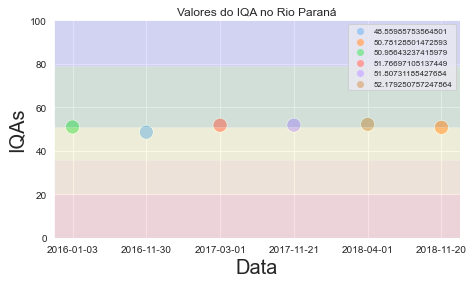

In [19]:
import seaborn as sns
s1 = pd.Series([index_list, iqa_list], index=['Data', 'IQAs'], name='s1')
with sns.axes_style("darkgrid"):
    fig = plt.figure(figsize=(16, 4))
    ax = fig.add_subplot(121)
    ax.set_ylim([0, 100])
    ax.set_xlabel('Data',fontsize = 20)
    ax.set_ylabel('IQAs', fontsize = 20)
    ax.set_title('Valores do IQA no Rio Paraná')
    ax.axhspan(0, 20, facecolor='red', alpha=0.1)
    ax.axhspan(20, 36, facecolor='orange', alpha=0.1)
    ax.axhspan(36, 51, facecolor='yellow', alpha=0.1)
    ax.axhspan(51, 79, facecolor='green', alpha=0.1)
    ax.axhspan(79, 100, facecolor='blue', alpha=0.1)
    sns.scatterplot(x='Data', y='IQAs', hue="IQAs",palette="pastel", data=s1, s=200)
    ax.legend(loc=1, prop={'size': 8})
    plt.savefig('IQAs_todos.png')
    plt.show()

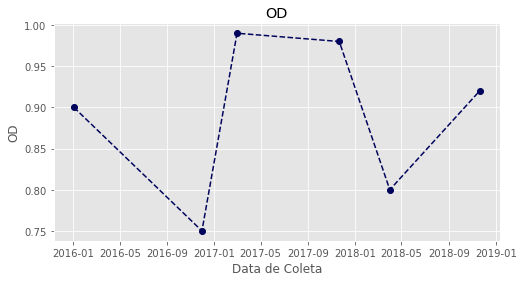

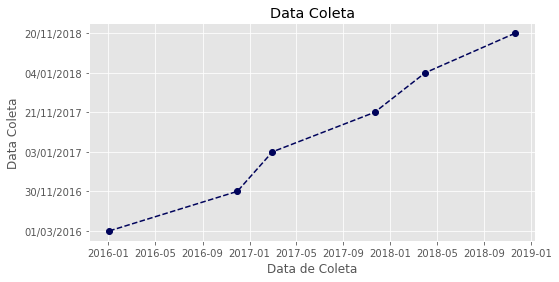

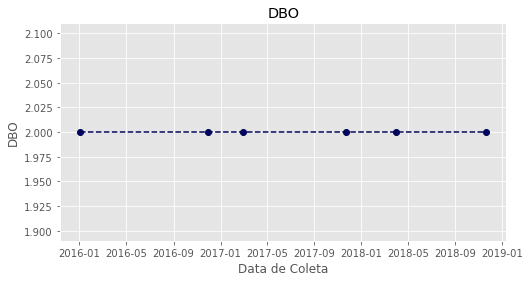

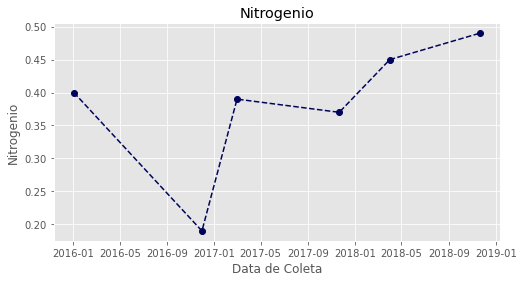

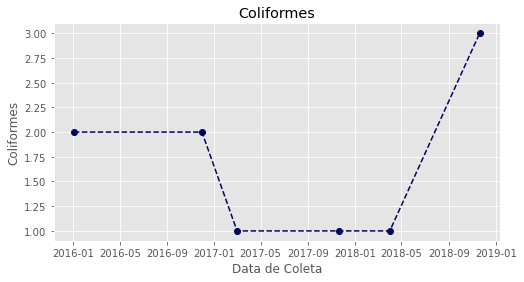

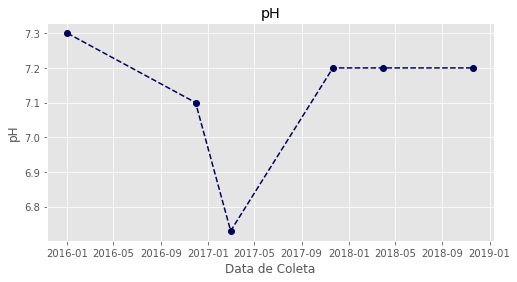

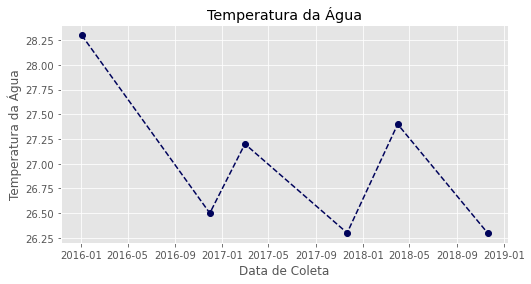

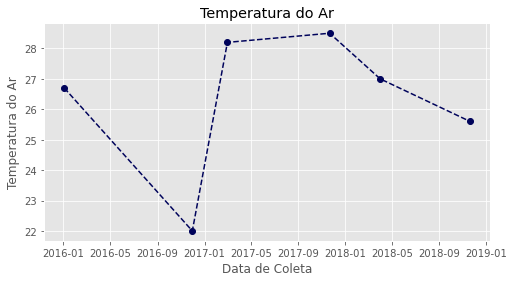

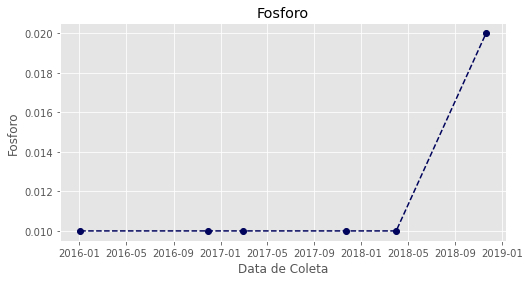

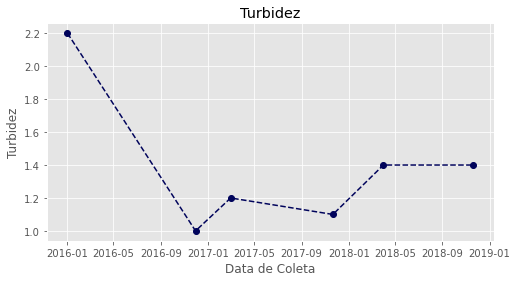

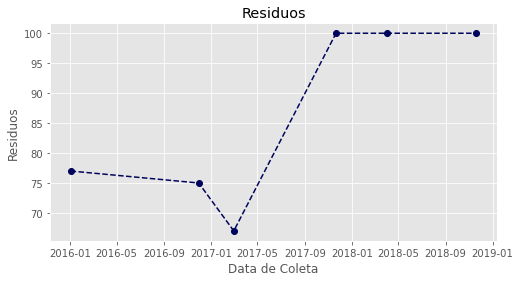

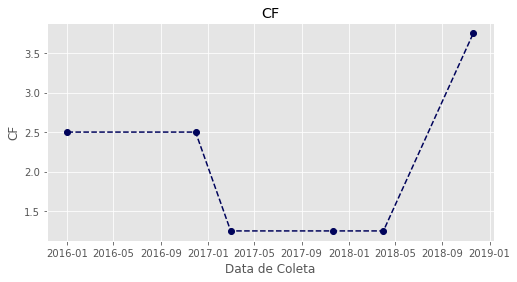

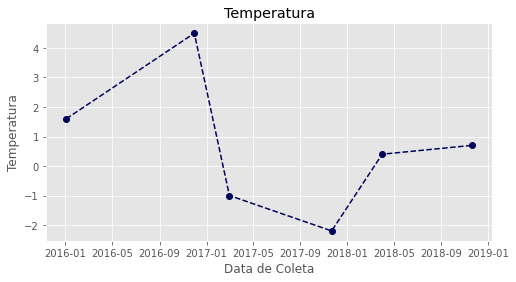

In [22]:
for i in range(0, len(df.columns)):
    plt.figure(figsize=(8,4))
    parameter = df.columns[i]
    serie = df[parameter]
    serieValorRaw = df[parameter]
    plt.grid(True)
    plt.plot(df.index, serieValorRaw, "--o", color='#00035b')
    plt.title(parameter)
    plt.xlabel("Data de Coleta")
    plt.ylabel(parameter)
    plt.savefig(f'plots/{i}.png')
    plt.show()

In [ ]:
df.columns

In [ ]:
df.index